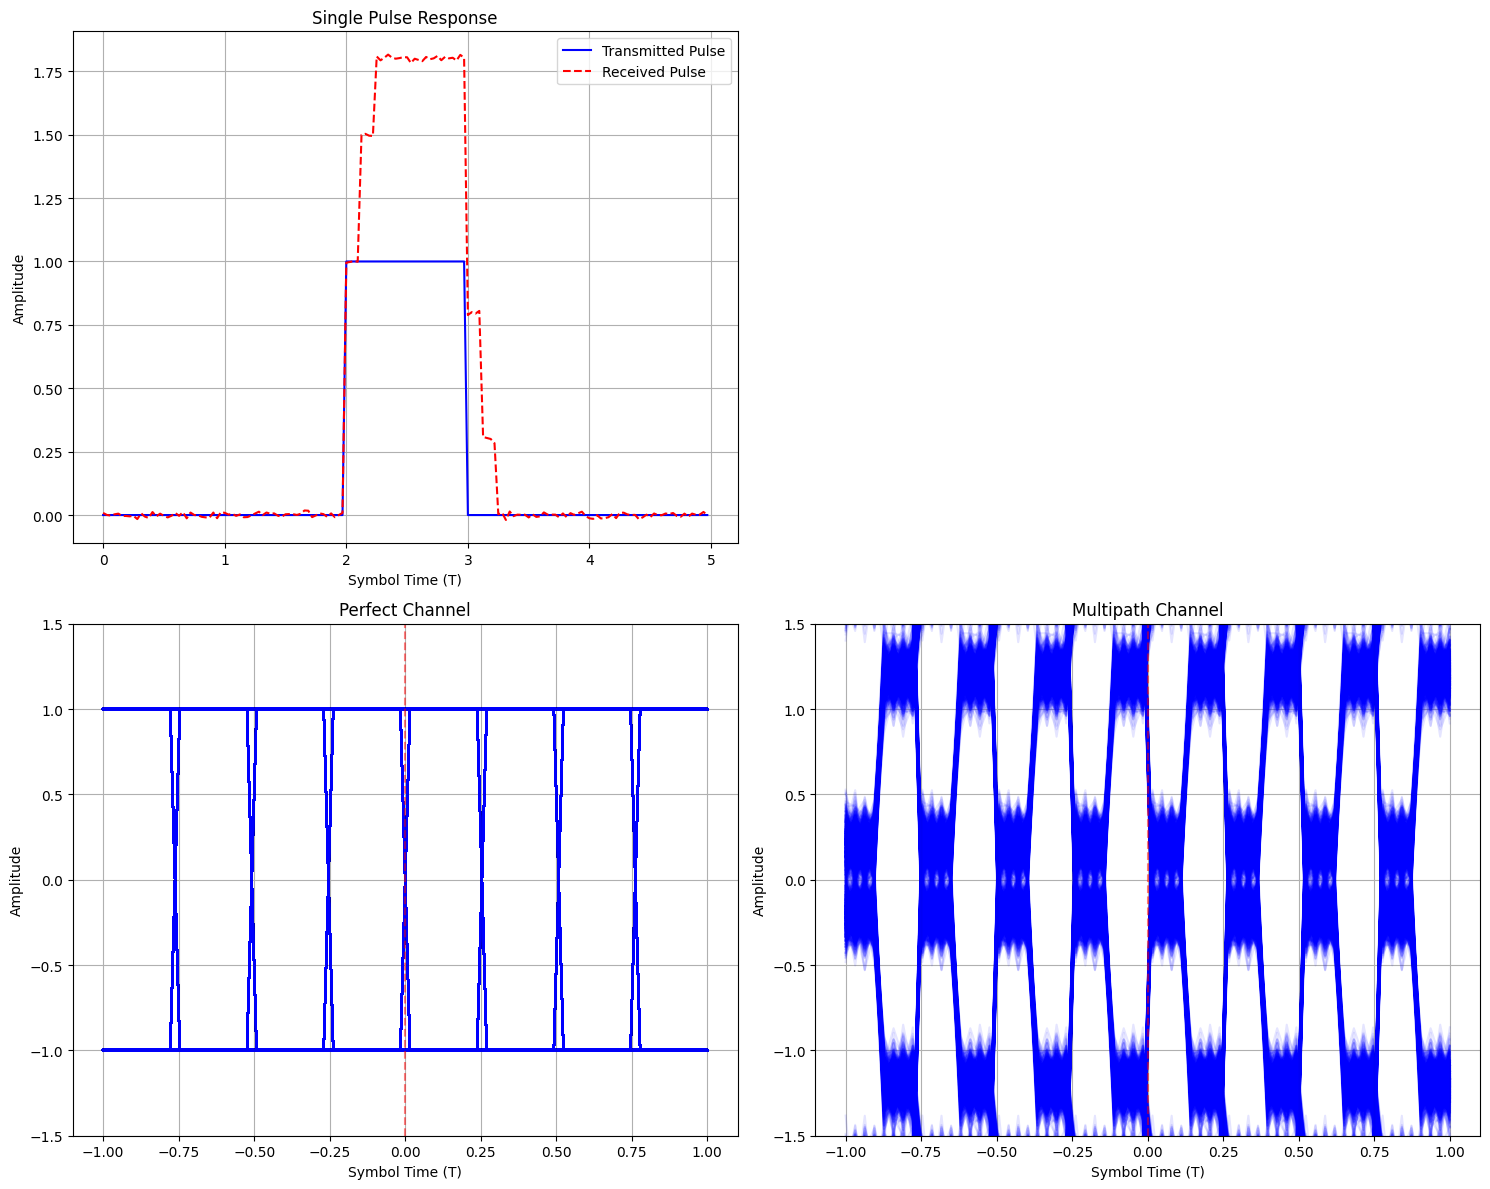

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_pam_signal(bits, samples_per_symbol):
    return np.repeat(2*bits - 1, samples_per_symbol)

def multipath_channel(signal, delays, gains, snr_db=20):
    output = np.zeros(len(signal))
    for delay, gain in zip(delays, gains):
        delayed_signal = np.pad(signal, (delay, 0))[:-delay] if delay > 0 else signal
        output += gain * delayed_signal

    signal_power = np.mean(output**2)
    noise_power = signal_power / (10**(snr_db/10))
    noise = np.random.normal(0, np.sqrt(noise_power), len(output))
    return output + noise

def plot_eye_diagram(signal, samples_per_symbol, title, subplot_idx):
    offset = samples_per_symbol // 2
    segments = []
    for i in range(offset, len(signal) - 2*samples_per_symbol, samples_per_symbol//4):
        segments.append(signal[i:i + 2*samples_per_symbol])
    segments = np.array(segments)

    t = np.linspace(-1, 1, 2*samples_per_symbol)

    plt.subplot(2, 2, subplot_idx)
    plt.plot(t, segments.T, 'b', alpha=0.1)
    plt.title(title)
    plt.grid(True)
    plt.axvline(x=0, color='r', linestyle='--', alpha=0.5, label='Sampling Point')
    plt.xlabel('Symbol Time (T)')
    plt.ylabel('Amplitude')
    plt.ylim(-1.5, 1.5)

# Simulation parameters
num_bits = 5000
samples_per_symbol = 32
t = np.arange(num_bits * samples_per_symbol) / samples_per_symbol

# Generate single pulse for visualization
single_pulse = np.zeros(samples_per_symbol * 5)
single_pulse[samples_per_symbol*2:samples_per_symbol*3] = 1

# Apply multipath to single pulse
delays = [0, 4, 8]  # Delays in samples
gains = [1.0, 0.5, 0.3]  # Path gains
distorted_pulse = multipath_channel(single_pulse, delays, gains, snr_db=40)

# Generate full signal
bits = np.random.randint(0, 2, num_bits)
tx_signal = generate_pam_signal(bits, samples_per_symbol)
rx_signal = multipath_channel(tx_signal, delays, gains, snr_db=25)

# Plotting
plt.figure(figsize=(15, 12))

# Plot single pulses
t_pulse = np.arange(len(single_pulse)) / samples_per_symbol
plt.subplot(2, 2, 1)
plt.plot(t_pulse, single_pulse, 'b-', label='Transmitted Pulse')
plt.plot(t_pulse, distorted_pulse, 'r--', label='Received Pulse')
plt.title('Single Pulse Response')
plt.grid(True)
plt.legend()
plt.xlabel('Symbol Time (T)')
plt.ylabel('Amplitude')

# Plot eye diagrams
plot_eye_diagram(tx_signal, samples_per_symbol, 'Perfect Channel', 3)
plot_eye_diagram(rx_signal, samples_per_symbol, 'Multipath Channel', 4)

plt.tight_layout()
plt.show()